# Tutorial 2 - Classification (Train)

## Open Dataset : MURA Dataset (Ver 1.0)

- MUsculoskeletal RAdiographs (Bone X-rays)         
- https://stanfordmlgroup.github.io/competitions/mura/
- https://arxiv.org/abs/1712.06957

In [1]:
# Python 3.6
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import h5py


import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import skimage
import scipy.io as sio

import keras
from keras.layers import Input

import keras.applications.inception_v3 as inception_v3
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.callbacks import  ModelCheckpoint, CSVLogger, ReduceLROnPlateau
import tensorflow as tf

from utils.custom_generator import custom_image_generator


/Users/dhlee/anaconda/envs/tensorflow3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Parameter Setting

In [2]:
########################################################################
########################################################################
epochs = 20
save_date = '1022'
network_name = 'Inception_v3_'
model_name = 'MURA_' + network_name + save_date + '_batch1.h5'

num_classes = 7 ## 14
batch_size = 64 
input_size = 299
########################################################################
########################################################################




## Path Setting

In [3]:
datapath = '../Dataset/MURA-v1.0/h5py/batch/'


save_path = os.path.join(os.getcwd(), 'Result/saved_model')
if not os.path.isdir(save_path):
    os.makedirs(save_path)    
model_path = os.path.join(save_path, model_name)

tf_graph_path = './Result/tf_graph/'    
if not os.path.isdir(tf_graph_path):
    os.makedirs(tf_graph_path)   
    
graph_path = './Result/graph_log/'    
if not os.path.isdir(graph_path):
    os.makedirs(graph_path)   

## Load Train Dataset

In [4]:
""" Battch 1 """
Batch1 = h5py.File(datapath +'Batch1.h5', 'r')
# print(list(Batch1))

elbow_img1 = np.array(Batch1['elbow_img1'])
elbow_label1 = np.array(Batch1['elbow_label1'])
elbow_id1 = np.load(datapath + 'Batch_ID1_elbow.npy')

finger_img1 = np.array(Batch1['finger_img1'])
finger_label1 = np.array(Batch1['finger_label1'])
finger_id1 = np.load(datapath + 'Batch_ID1_finger.npy')

forearm_img1 = np.array(Batch1['forearm_img1'])
forearm_label1 = np.array(Batch1['forearm_label1'])
forearm_id1 = np.load(datapath + 'Batch_ID1_forearm.npy')

hand_img1 = np.array(Batch1['hand_img1'])
hand_label1 = np.array(Batch1['hand_label1'])
hand_id1 = np.load(datapath + 'Batch_ID1_hand.npy')

humerus_img1 = np.array(Batch1['humerus_img1'])
humerus_label1 = np.array(Batch1['humerus_label1'])
humerus_id1 = np.load(datapath + 'Batch_ID1_humerus.npy')

shoulder_img1 = np.array(Batch1['shoulder_img1'])
shoulder_label1 = np.array(Batch1['shoulder_label1'])
shoulder_id1 = np.load(datapath +  'Batch_ID1_shoulder.npy')

wrist_img1 = np.array(Batch1['wrist_img1'])
wrist_label1 = np.array(Batch1['wrist_label1'])
wrist_id1 = np.load(datapath +  'Batch_ID1_wrist.npy')

print("\n*** Batch 1 ***")                       
print("Elbow: ", np.shape(elbow_img1), np.shape(elbow_label1))
print("Finger: ", np.shape(finger_img1), np.shape(finger_label1))
print("Forearm: ", np.shape(forearm_img1), np.shape(forearm_label1))
print("Hand: ", np.shape(hand_img1), np.shape(hand_label1))
print("Humerus: ", np.shape(humerus_img1), np.shape(humerus_label1))
print("Shoulder: ", np.shape(shoulder_img1), np.shape(shoulder_label1))
print("Wrist: ", np.shape(wrist_img1), np.shape(wrist_label1))


""" Battch 2 """
Batch2 = h5py.File(datapath +'Batch2.h5', 'r')

elbow_img2 = np.array(Batch2['elbow_img2'])
elbow_label2 = np.array(Batch2['elbow_label2'])
elbow_id2 = np.load(datapath +  'Batch_ID2_elbow.npy')

finger_img2 = np.array(Batch2['finger_img2'])
finger_label2 = np.array(Batch2['finger_label2'])
finger_id2 = np.load(datapath +  'Batch_ID2_finger.npy')

forearm_img2 = np.array(Batch2['forearm_img2'])
forearm_label2 = np.array(Batch2['forearm_label2'])
forearm_id2 = np.load(datapath + 'Batch_ID2_forearm.npy')

hand_img2 = np.array(Batch2['hand_img2'])
hand_label2 = np.array(Batch2['hand_label2'])
hand_id2 = np.load(datapath + 'Batch_ID2_hand.npy')

humerus_img2 = np.array(Batch2['humerus_img2'])
humerus_label2 = np.array(Batch2['humerus_label2'])
humerus_id2 = np.load(datapath + 'Batch_ID2_humerus.npy')

shoulder_img2 = np.array(Batch2['shoulder_img2'])
shoulder_label2 = np.array(Batch2['shoulder_label2'])
shoulder_id2 = np.load(datapath +  'Batch_ID2_shoulder.npy')

wrist_img2 = np.array(Batch2['wrist_img2'])
wrist_label2 = np.array(Batch2['wrist_label2'])
wrist_id2 = np.load(datapath +  'Batch_ID2_wrist.npy')

print("\n*** Batch 2 ***")                       
print("Elbow: ", np.shape(elbow_img2), np.shape(elbow_label2))
print("Finger: ", np.shape(finger_img2), np.shape(finger_label2))
print("Forearm: ", np.shape(forearm_img2), np.shape(forearm_label2))
print("Hand: ", np.shape(hand_img2), np.shape(hand_label2))
print("Humerus: ", np.shape(humerus_img2), np.shape(humerus_label2))
print("Shoulder: ", np.shape(shoulder_img2), np.shape(shoulder_label2))
print("Wrist: ", np.shape(wrist_img2), np.shape(wrist_label2))


""" Battch 3 """
Batch3 = h5py.File(datapath +'Batch3.h5', 'r')

elbow_img3 = np.array(Batch3['elbow_img3'])
elbow_label3 = np.array(Batch3['elbow_label3'])
elbow_id3 = np.load(datapath +  'Batch_ID3_elbow.npy')

finger_img3 = np.array(Batch3['finger_img3'])
finger_label3 = np.array(Batch3['finger_label3'])
finger_id3 = np.load(datapath +  'Batch_ID3_finger.npy')

forearm_img3 = np.array(Batch3['forearm_img3'])
forearm_label3 = np.array(Batch3['forearm_label3'])
forearm_id3 = np.load(datapath +  'Batch_ID3_forearm.npy')

hand_img3 = np.array(Batch3['hand_img3'])
hand_label3 = np.array(Batch3['hand_label3'])
hand_id3= np.load(datapath +  'Batch_ID3_hand.npy')

humerus_img3 = np.array(Batch3['humerus_img3'])
humerus_label3 = np.array(Batch3['humerus_label3'])
humerus_id3 = np.load(datapath +  'Batch_ID3_humerus.npy')

shoulder_img3 = np.array(Batch3['shoulder_img3'])
shoulder_label3 = np.array(Batch3['shoulder_label3'])
shoulder_id3 = np.load(datapath +  'Batch_ID3_shoulder.npy')

wrist_img3 = np.array(Batch3['wrist_img3'])
wrist_label3 = np.array(Batch3['wrist_label3'])
wrist_id3 = np.load(datapath +  'Batch_ID3_wrist.npy')

print("\n*** Batch 3 ***")                       
print("Elbow: ", np.shape(elbow_img3), np.shape(elbow_label3))
print("Finger: ", np.shape(finger_img3), np.shape(finger_label3))
print("Forearm: ", np.shape(forearm_img3), np.shape(forearm_label3))
print("Hand: ", np.shape(hand_img3), np.shape(hand_label3))
print("Humerus: ", np.shape(humerus_img3), np.shape(humerus_label3))
print("Shoulder: ", np.shape(shoulder_img3), np.shape(shoulder_label3))
print("Wrist: ", np.shape(wrist_img3), np.shape(wrist_label3))


""" Battch 4 """
Batch4 = h5py.File(datapath +'Batch4.h5', 'r')

elbow_img4 = np.array(Batch4['elbow_img4'])
elbow_label4 = np.array(Batch4['elbow_label4'])
elbow_id4 = np.load(datapath +  'Batch_ID4_elbow.npy')

finger_img4 = np.array(Batch4['finger_img4'])
finger_label4 = np.array(Batch4['finger_label4'])
finger_id4 = np.load(datapath + 'Batch_ID4_finger.npy')

forearm_img4 = np.array(Batch4['forearm_img4'])
forearm_label4 = np.array(Batch4['forearm_label4'])
forearm_id4 = np.load(datapath +  'Batch_ID4_forearm.npy')

hand_img4 = np.array(Batch4['hand_img4'])
hand_label4 = np.array(Batch4['hand_label4'])
hand_id4 = np.load(datapath +  'Batch_ID4_hand.npy')

humerus_img4 = np.array(Batch4['humerus_img4'])
humerus_label4 = np.array(Batch4['humerus_label4'])
humerus_id4 = np.load(datapath +  'Batch_ID4_humerus.npy')

shoulder_img4 = np.array(Batch4['shoulder_img4'])
shoulder_label4 = np.array(Batch4['shoulder_label4'])
shoulder_id4 = np.load(datapath + 'Batch_ID4_shoulder.npy')

wrist_img4 = np.array(Batch4['wrist_img4'])
wrist_label4 = np.array(Batch4['wrist_label4'])
wrist_id4 = np.load(datapath +  'Batch_ID4_wrist.npy')

print("\n*** Batch 4 ***")                       
print("Elbow: ", np.shape(elbow_img4), np.shape(elbow_label4))
print("Finger: ", np.shape(finger_img4), np.shape(finger_label4))
print("Forearm: ", np.shape(forearm_img4), np.shape(forearm_label4))
print("Hand: ", np.shape(hand_img4), np.shape(hand_label4))
print("Humerus: ", np.shape(humerus_img4), np.shape(humerus_label4))
print("Shoulder: ", np.shape(shoulder_img4), np.shape(shoulder_label4))
print("Wrist: ", np.shape(wrist_img4), np.shape(wrist_label4))


""" Battch 5 """
Batch5 = h5py.File(datapath +'Batch5.h5', 'r')

elbow_img5 = np.array(Batch5['elbow_img5'])
elbow_label5 = np.array(Batch5['elbow_label5'])
elbow_id5 = np.load(datapath +  'Batch_ID5_elbow.npy')

finger_img5 = np.array(Batch5['finger_img5'])
finger_label5 = np.array(Batch5['finger_label5'])
finger_id5 = np.load(datapath + 'Batch_ID5_finger.npy')

forearm_img5 = np.array(Batch5['forearm_img5'])
forearm_label5 = np.array(Batch5['forearm_label5'])
forearm_id5 = np.load(datapath +  'Batch_ID5_forearm.npy')

hand_img5 = np.array(Batch5['hand_img5'])
hand_label5 = np.array(Batch5['hand_label5'])
hand_id5 = np.load(datapath +  'Batch_ID5_hand.npy')

humerus_img5 = np.array(Batch5['humerus_img5'])
humerus_label5 = np.array(Batch5['humerus_label5'])
humerus_id5 = np.load(datapath + 'Batch_ID5_humerus.npy')

shoulder_img5 = np.array(Batch5['shoulder_img5'])
shoulder_label5 = np.array(Batch5['shoulder_label5'])
shoulder_id5 = np.load(datapath +  'Batch_ID5_shoulder.npy')

wrist_img5 = np.array(Batch5['wrist_img5'])
wrist_label5 = np.array(Batch5['wrist_label5'])
wrist_id5 = np.load(datapath +  'Batch_ID5_wrist.npy')

print("\n*** Batch 5 ***")                       
print("Elbow: ", np.shape(elbow_img5), np.shape(elbow_label5))
print("Finger: ", np.shape(finger_img5), np.shape(finger_label5))
print("Forearm: ", np.shape(forearm_img5), np.shape(forearm_label5))
print("Hand: ", np.shape(hand_img5), np.shape(hand_label5))
print("Humerus: ", np.shape(humerus_img5), np.shape(humerus_label5))
print("Shoulder: ", np.shape(shoulder_img5), np.shape(shoulder_label5))
print("Wrist: ", np.shape(wrist_img5), np.shape(wrist_label5))



print("\n***** Load Dataset Complete *****")


***Batch1***
Elbow:  (1002, 299, 299, 3) (1002, 2)
Finger:  (1023, 299, 299, 3) (1023, 2)
Forearm:  (372, 299, 299, 3) (372, 2)
Hand:  (1109, 299, 299, 3) (1109, 2)
Humerus:  (268, 299, 299, 3) (268, 2)
Shoulder:  (1692, 299, 299, 3) (1692, 2)
Wrist:  (1962, 299, 299, 3) (1962, 2)

***Batch2***
Elbow:  (1002, 299, 299, 3) (1002, 2)
Finger:  (1023, 299, 299, 3) (1023, 2)
Forearm:  (372, 299, 299, 3) (372, 2)
Hand:  (1109, 299, 299, 3) (1109, 2)
Humerus:  (268, 299, 299, 3) (268, 2)
Shoulder:  (1692, 299, 299, 3) (1692, 2)
Wrist:  (1962, 299, 299, 3) (1962, 2)

***Batch3***
Elbow:  (1002, 299, 299, 3) (1002, 2)
Finger:  (1023, 299, 299, 3) (1023, 2)
Forearm:  (372, 299, 299, 3) (372, 2)
Hand:  (1109, 299, 299, 3) (1109, 2)
Humerus:  (268, 299, 299, 3) (268, 2)
Shoulder:  (1692, 299, 299, 3) (1692, 2)
Wrist:  (1962, 299, 299, 3) (1962, 2)

***Batch4***
Elbow:  (1002, 299, 299, 3) (1002, 2)
Finger:  (1023, 299, 299, 3) (1023, 2)
Forearm:  (372, 299, 299, 3) (372, 2)
Hand:  (1109, 299, 299

### Practice : 양성 3종류 분류 (for easy training)

In [5]:
elbow_label_list1 = []
elbow_label_list2 = []
elbow_label_list3 = []
elbow_label_list4 = []
elbow_label_list5 = []
for i in range(len(elbow_label1)):
    elbow_label_list1.append(0)
for i in range(len(elbow_label2)):
    elbow_label_list2.append(0)
for i in range(len(elbow_label3)):
    elbow_label_list3.append(0)
for i in range(len(elbow_label4)):
    elbow_label_list4.append(0)
for i in range(len(elbow_label5)):
    elbow_label_list5.append(0)
elbow_label1 = keras.utils.to_categorical(elbow_label_list1, num_classes) 
elbow_label2 = keras.utils.to_categorical(elbow_label_list2, num_classes) 
elbow_label3 = keras.utils.to_categorical(elbow_label_list3, num_classes) 
elbow_label4 = keras.utils.to_categorical(elbow_label_list4, num_classes) 
elbow_label5 = keras.utils.to_categorical(elbow_label_list5, num_classes) 


finger_label_list1 = []
finger_label_list2 = []
finger_label_list3 = []
finger_label_list4 = []
finger_label_list5 = []
for i in range(len(finger_label1)):
    finger_label_list1.append(1)
for i in range(len(finger_label2)):
    finger_label_list2.append(1)
for i in range(len(finger_label3)):
    finger_label_list3.append(1)
for i in range(len(finger_label4)):
    finger_label_list4.append(1)
for i in range(len(finger_label5)):
    finger_label_list5.append(1)
finger_label1 = keras.utils.to_categorical(finger_label_list1, num_classes) 
finger_label2 = keras.utils.to_categorical(finger_label_list2, num_classes) 
finger_label3 = keras.utils.to_categorical(finger_label_list3, num_classes) 
finger_label4 = keras.utils.to_categorical(finger_label_list4, num_classes) 
finger_label5 = keras.utils.to_categorical(finger_label_list5, num_classes) 


forearm_label_list1 = []
forearm_label_list2 = []
forearm_label_list3 = []
forearm_label_list4 = []
forearm_label_list5 = []
for i in range(len(forearm_label1)):
    forearm_label_list1.append(2)
for i in range(len(forearm_label2)):
    forearm_label_list2.append(2)
for i in range(len(forearm_label3)):
    forearm_label_list3.append(2)
for i in range(len(forearm_label4)):
    forearm_label_list4.append(2)
for i in range(len(forearm_label5)):
    forearm_label_list5.append(2)    
forearm_label1 = keras.utils.to_categorical(forearm_label_list1, num_classes)     
forearm_label2 = keras.utils.to_categorical(forearm_label_list2, num_classes)     
forearm_label3 = keras.utils.to_categorical(forearm_label_list3, num_classes)     
forearm_label4 = keras.utils.to_categorical(forearm_label_list4, num_classes)     
forearm_label5 = keras.utils.to_categorical(forearm_label_list5, num_classes)     


hand_label_list1 = []
hand_label_list2 = []
hand_label_list3 = []
hand_label_list4 = []
hand_label_list5 = []
for i in range(len(hand_label1)):
    hand_label_list1.append(3)
for i in range(len(hand_label2)):
    hand_label_list2.append(3)
for i in range(len(hand_label3)):
    hand_label_list3.append(3)
for i in range(len(hand_label4)):
    hand_label_list4.append(3)
for i in range(len(hand_label5)):
    hand_label_list5.append(3)
hand_label1 = keras.utils.to_categorical(hand_label_list1, num_classes)       
hand_label2 = keras.utils.to_categorical(hand_label_list2, num_classes)       
hand_label3 = keras.utils.to_categorical(hand_label_list3, num_classes)       
hand_label4 = keras.utils.to_categorical(hand_label_list4, num_classes)       
hand_label5 = keras.utils.to_categorical(hand_label_list5, num_classes)       


humerus_label_list1 = []
humerus_label_list2 = []
humerus_label_list3 = []
humerus_label_list4 = []
humerus_label_list5 = []
for i in range(len(humerus_label1)):
    humerus_label_list1.append(4)
for i in range(len(humerus_label2)):
    humerus_label_list2.append(4)
for i in range(len(humerus_label3)):
    humerus_label_list3.append(4)
for i in range(len(humerus_label4)):
    humerus_label_list4.append(4)
for i in range(len(humerus_label5)):
    humerus_label_list5.append(4)
humerus_label1 = keras.utils.to_categorical(humerus_label_list1, num_classes)   
humerus_label2 = keras.utils.to_categorical(humerus_label_list2, num_classes)  
humerus_label3 = keras.utils.to_categorical(humerus_label_list3, num_classes)  
humerus_label4 = keras.utils.to_categorical(humerus_label_list4, num_classes)  
humerus_label5 = keras.utils.to_categorical(humerus_label_list5, num_classes)  
               
               
shoulder_label_list1 = []               
shoulder_label_list2 = []               
shoulder_label_list3 = []               
shoulder_label_list4 = []               
shoulder_label_list5 = []                              
for i in range(len(shoulder_label1)):
    shoulder_label_list1.append(5)
for i in range(len(shoulder_label2)):
    shoulder_label_list2.append(5)
for i in range(len(shoulder_label3)):
    shoulder_label_list3.append(5)
for i in range(len(shoulder_label4)):
    shoulder_label_list4.append(5)
for i in range(len(shoulder_label5)):
    shoulder_label_list5.append(5)       
shoulder_label1 = keras.utils.to_categorical(shoulder_label_list1, num_classes)                  
shoulder_label2 = keras.utils.to_categorical(shoulder_label_list2, num_classes)
shoulder_label3 = keras.utils.to_categorical(shoulder_label_list3, num_classes)       
shoulder_label4 = keras.utils.to_categorical(shoulder_label_list4, num_classes)       
shoulder_label5 = keras.utils.to_categorical(shoulder_label_list5, num_classes)       

               
wrist_label_list1 = []   
wrist_label_list2 = []   
wrist_label_list3 = []   
wrist_label_list4 = []   
wrist_label_list5 = []                  
for i in range(len(wrist_label1)):
    wrist_label_list1.append(6)               
for i in range(len(wrist_label2)):
    wrist_label_list2.append(6)               
for i in range(len(wrist_label3)):
    wrist_label_list3.append(6)               
for i in range(len(wrist_label4)):
    wrist_label_list4.append(6)               
for i in range(len(wrist_label5)):
    wrist_label_list5.append(6)                              
wrist_label1 = keras.utils.to_categorical(wrist_label_list1, num_classes)                  
wrist_label2 = keras.utils.to_categorical(wrist_label_list2, num_classes)                  
wrist_label3 = keras.utils.to_categorical(wrist_label_list3, num_classes)                  
wrist_label4 = keras.utils.to_categorical(wrist_label_list4, num_classes)                  
wrist_label5 = keras.utils.to_categorical(wrist_label_list5, num_classes)                  
     
            

In [6]:
""" Cls = 3"""
# batch_img1 = np.concatenate((elbow_img1, finger_img1, forearm_img1), axis=0)
# batch_img2 = np.concatenate((elbow_img2, finger_img2, forearm_img2), axis=0)
# batch_img3 = np.concatenate((elbow_img3, finger_img3, forearm_img3), axis=0)
# batch_img4 = np.concatenate((elbow_img4, finger_img4, forearm_img4), axis=0)
# batch_img5 = np.concatenate((elbow_img5, finger_img5, forearm_img5), axis=0)

# batch_label1 = np.concatenate((elbow_label1, finger_label1, forearm_label1), axis=0)
# batch_label2 = np.concatenate((elbow_label2, finger_label2, forearm_label2), axis=0)
# batch_label3 = np.concatenate((elbow_label3, finger_label3, forearm_label3), axis=0)
# batch_label4 = np.concatenate((elbow_label4, finger_label4, forearm_label4), axis=0)
# batch_label5 = np.concatenate((elbow_label5, finger_label5, forearm_label5), axis=0)

# batch_id1 = np.concatenate((elbow_id1, finger_id1, forearm_id1), axis=0)
# batch_id2 = np.concatenate((elbow_id2, finger_id2, forearm_id2), axis=0)
# batch_id3 = np.concatenate((elbow_id3, finger_id3, forearm_id3), axis=0)
# batch_id4 = np.concatenate((elbow_id4, finger_id4, forearm_id4), axis=0)
# batch_id5 = np.concatenate((elbow_id5, finger_id4, forearm_id5), axis=0)

""" Cls = 7"""
batch_img1 = np.concatenate((elbow_img1, finger_img1, forearm_img1, hand_img1, humerus_img1, shoulder_img1, wrist_img1), axis=0)
batch_img2 = np.concatenate((elbow_img2, finger_img2, forearm_img2, hand_img2, humerus_img2, shoulder_img2, wrist_img2), axis=0)
batch_img3 = np.concatenate((elbow_img3, finger_img3, forearm_img3, hand_img3, humerus_img3, shoulder_img3, wrist_img3), axis=0)
batch_img4 = np.concatenate((elbow_img4, finger_img4, forearm_img4, hand_img4, humerus_img4, shoulder_img4, wrist_img4), axis=0)
batch_img5 = np.concatenate((elbow_img5, finger_img5, forearm_img5, hand_img5, humerus_img5, shoulder_img5, wrist_img5), axis=0)

batch_label1 = np.concatenate((elbow_label1, finger_label1, forearm_label1, hand_label1, humerus_label1, shoulder_label1, wrist_label1), axis=0)
batch_label2 = np.concatenate((elbow_label2, finger_label2, forearm_label2, hand_label2, humerus_label2, shoulder_label2, wrist_label2), axis=0)
batch_label3 = np.concatenate((elbow_label3, finger_label3, forearm_label3, hand_label3, humerus_label3, shoulder_label3, wrist_label3), axis=0)
batch_label4 = np.concatenate((elbow_label4, finger_label4, forearm_label4, hand_label4, humerus_label4, shoulder_label4, wrist_label4), axis=0)
batch_label5 = np.concatenate((elbow_label5, finger_label5, forearm_label5, hand_label5, humerus_label5, shoulder_label5, wrist_label5), axis=0)

batch_id1 = np.concatenate((elbow_id1, finger_id1, forearm_id1, hand_id1, humerus_id1, shoulder_id1, wrist_id1), axis=0)
batch_id2 = np.concatenate((elbow_id2, finger_id2, forearm_id2, hand_id2, humerus_id2, shoulder_id2, wrist_id2), axis=0)
batch_id3 = np.concatenate((elbow_id3, finger_id3, forearm_id3, hand_id3, humerus_id3, shoulder_id3, wrist_id3), axis=0)
batch_id4 = np.concatenate((elbow_id4, finger_id4, forearm_id4, hand_id4, humerus_id4, shoulder_id4, wrist_id4), axis=0)
batch_id5 = np.concatenate((elbow_id5, finger_id5, forearm_id5, hand_id5, humerus_id5, shoulder_id5, wrist_id5), axis=0)

print(np.shape(batch_img1))
print(np.shape(batch_img2))
print(np.shape(batch_img3))
print(np.shape(batch_img4))
print(np.shape(batch_img5))

print(np.shape(batch_label1))
print(np.shape(batch_label2))
print(np.shape(batch_label3))
print(np.shape(batch_label4))
print(np.shape(batch_label5))

print(np.shape(batch_id1))
print(np.shape(batch_id2))
print(np.shape(batch_id2))
print(np.shape(batch_id2))
print(np.shape(batch_id2))


""" Shuffling """ 
# np.random.seed(0)
# np.random.shuffle(batch_img1)
# np.random.seed(0)
# np.random.shuffle(batch_img2)
# np.random.seed(0)
# np.random.shuffle(batch_img3)
# np.random.seed(0)
# np.random.shuffle(batch_img4)
# np.random.seed(0)
# np.random.shuffle(batch_img5)

# np.random.seed(0)
# np.random.shuffle(batch_label1)
# np.random.seed(0)
# np.random.shuffle(batch_label2)
# np.random.seed(0)
# np.random.shuffle(batch_label3)
# np.random.seed(0)
# np.random.shuffle(batch_label4)
# np.random.seed(0)
# np.random.shuffle(batch_label5)

# np.random.seed(0)
# np.random.shuffle(batch_id1)
# np.random.seed(0)
# np.random.shuffle(batch_id2)
# np.random.seed(0)
# np.random.shuffle(batch_id3)
# np.random.seed(0)
# np.random.shuffle(batch_id4)
# np.random.seed(0)
# np.random.shuffle(batch_id5)



(2397, 299, 299, 3)
(2397, 299, 299, 3)
(2397, 299, 299, 3)
(2397, 299, 299, 3)
(2388, 299, 299, 3)
(2397, 3)
(2397, 3)
(2397, 3)
(2397, 3)
(2388, 3)
(2397, 1)
(2397, 1)
(2397, 1)
(2397, 1)
(2397, 1)


' Shuffling '

## Dataset Preparation

- Task1 : cls = 7 (해부학적 종류)
- Task2 : cls = 14 (해부학적 종류 x 양성/악성)

- Cross-Validation (5-folds)

In [26]:
###################################################################
###################################################################
""" Batch1 """  
X_train = np.concatenate((batch_img2, batch_img3, batch_img4, batch_img5),axis=0)
y_train = np.concatenate((batch_label2, batch_label3, batch_label4, batch_label5), axis=0)
id_train = np.concatenate((batch_id2, batch_id3, batch_id4, batch_id5), axis=0)

X_val = batch_img1
y_val = batch_label1
id_val = batch_id1

""" Batch2 """  
# X_train = np.concatenate((elbow_img1, elbow_img3, elbow_img4, elbow_img5),axis=0)
# y_train = np.concatenate((elbow_label1, elbow_label3, elbow_label4, elbow_label5), axis=0)
# X_val = elbow_img2
# y_val = elbow_label2

""" Batch3 """  
# X_train = np.concatenate((elbow_img1, elbow_img2, elbow_img4, elbow_img5),axis=0)
# y_train = np.concatenate((elbow_label1, elbow_label2, elbow_label4, elbow_label5), axis=0)
# X_val = elbow_img3
# y_val = elbow_label3

""" Batch4 """  
# X_train = np.concatenate((elbow_img1, elbow_img2, elbow_img3, elbow_img5),axis=0)
# y_train = np.concatenate((elbow_label1, elbow_label2, elbow_label3, elbow_label5), axis=0)
# X_val = elbow_img4
# y_val = elbow_label4

""" Batch5 """  
# X_train = np.concatenate((elbow_img1, elbow_img2, elbow_img3, elbow_img4),axis=0)
# y_train = np.concatenate((elbow_label1, elbow_label2, elbow_label3, elbow_label4), axis=0)
# X_val = elbow_img5
# y_val = elbow_label5

' Batch5 '

In [28]:
""" Save Validation """
with h5py.File(datapath + 'Validation.h5', 'w') as hf:
    hf.create_dataset('Image', data=X_val, compression='lzf')
    hf.create_dataset('Label', data=y_val, compression='lzf')
               
np.save(datapath + 'Valid_ID.npy', id_val)

## Data Imbalance Solution
- Weighted Cross Entropy (v)
- Data Augmentation using GAN

In [8]:
cls0_num = 0
cls1_num = 0
cls2_num = 0
cls3_num = 0
cls4_num = 0
cls5_num = 0
cls6_num = 0
for i in range(len(y_train)):
    if y_train[i][0] == 1:
        cls0_num +=1
    elif y_train[i][1] == 1:
        cls1_num +=1
    elif y_train[i][2] == 1:
        cls2_num +=1
    elif y_train[i][3] == 1:
        cls3_num +=1
    elif y_train[i][4] == 1:
        cls4_num +=1 
    elif y_train[i][5] == 1:
        cls5_num +=1
    elif y_train[i][6] == 1:
        cls6_num +=1    
print("Class0: " + str(cls0_num), "Class1: " + str(cls1_num), "Class2: " + str(cls2_num), 
      "Class3: " + str(cls3_num), "Class4: " + str(cls4_num), "Class5: " + str(cls5_num), "Class6: " + str(cls6_num))

total_num = cls0_num+cls1_num+cls2_num+cls3_num+cls4_num+cls5_num+cls6_num
total_mul = cls0_num*cls1_num*cls2_num*cls3_num*cls4_num*cls5_num*cls6_num

weight0 = round((total_mul/cls0_num)/(10**22), 3)
weight1 = round((total_mul/cls1_num)/(10**22), 3)
weight2 = round((total_mul/cls2_num)/(10**22), 3)
weight3 = round((total_mul/cls3_num)/(10**22), 3)
weight4 = round((total_mul/cls4_num)/(10**22), 3)
weight5 = round((total_mul/cls5_num)/(10**22), 3)
weight6 = round((total_mul/cls6_num)/(10**22), 3)

class_weights = {0: weight0, 1: weight1, 2: weight2, 3: weight3, 4: weight4, 5: weight5,  6: weight6}

print(weight0, weight1, weight2, weight3, weight4, weight5, weight6)


Class0: 4007 Class1: 4088 Class2: 1484
0.607 0.595 1.638


## Augmentation

- Default (Keras) (v)
- imgaug

### Augmentation Method Check

In [9]:
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


sample = X_train[0]

data_aug_gen = ImageDataGenerator(
                       rotation_range= 30,
                       shear_range = 0.2,
                       zoom_range = [0.7, 1.3],
                       width_shift_range= 1.0,
                       height_shift_range= 1.0,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='reflect' # constant, nearest, reflect, wrap
                       )

img = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
img = img_to_array(img)
img = img.reshape((1,) + img.shape)

""" Save """
i = 1
count = 30
for batch in data_aug_gen.flow(img, batch_size=1, save_to_dir='./aug_check', save_prefix='aug', save_format='png'):
    i += 1
    if i > count: 
        break

### Augmentation (Default: keras)

In [15]:
train_generator = custom_image_generator(
    ImageDataGenerator( rescale=1./255,
                       # samplewise_center=True,  # featurewise_center; big data
                       # samplewise_std_normalization=True,
                       # zca_whitening=True,
                       # zca_epsilon=1e-06,
                       rotation_range= 30,
                       shear_range = 0.2,
                       zoom_range = [0.7, 1.3],
                       width_shift_range= 1.0,
                       height_shift_range= 1.0,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='reflect'
                       ),
    X_train, y_train,
    seed=1,  # Use a specific random seed
    batch_size=batch_size
)

val_generator = custom_image_generator(
    ImageDataGenerator(rescale=1./255,
                       # samplewise_center=True,  # featurewise_center; big data
                       # samplewise_std_normalization=True,
                       # zca_whitening=True,
                       # zca_epsilon=1e-06,
                       rotation_range= 30,
                       shear_range = 0.2,
                       zoom_range = [0.7, 1.3],
                       width_shift_range = 1.0,
                       height_shift_range= 1.0,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='reflect'
                       ),
    X_val, y_val,
    seed=1,  # Use a specific random seed
    batch_size=batch_size
)

### Augmentation (External: imgaug)

[]

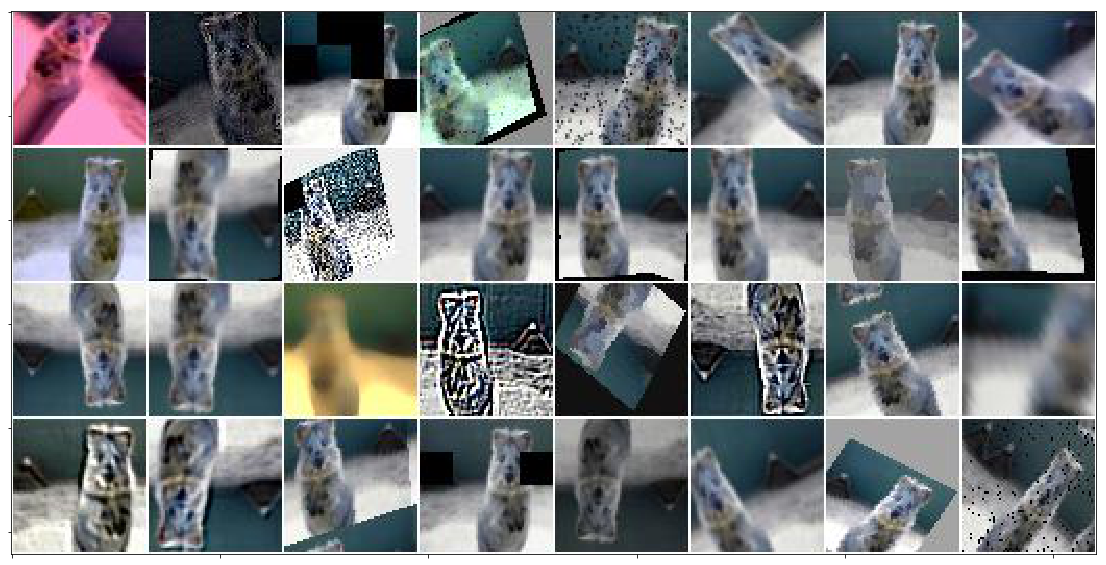

In [9]:
plot1 = plt.imread('../assets/imgaug.jpg')
plt.figure(figsize=(20,10))
plt.imshow(plot1)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])


In [12]:
import imgaug as ia
from imgaug import augmenters as iaa
import cv2

ia.seed(1)

images = X_train[0]
images = np.array(images)

# images = np.array(
#     [ia.quokka(size=(64, 64)) for _ in range(32)],
#     dtype=np.uint8
# )

count = 30      
for i in range(count):
    seq = iaa.Sequential([
        iaa.Fliplr(0.5), # horizontal flips
        iaa.Crop(percent=(0, 0.1)), # random crops
        iaa.Sometimes(0.5,
            iaa.GaussianBlur(sigma=(0, 0.5))
        ),
#         iaa.ContrastNormalization((0.75, 1.5)),
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-25, 25),
            shear=(-8, 8)
        )
    ], random_order=True) # apply augmenters in random order

    images_aug = seq.augment_images(images)




/Users/dhlee/anaconda/envs/tensorflow3/lib/python3.6/site-packages/imgaug/augmenters/meta.py:313: UserWarning: You provided a numpy array of shape (299, 299, 3) as input to augment_images(), which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use augment_image(image) or augment_images([image]), otherwise you will not get the expected augmentations.
  "you will not get the expected augmentations." % (images_copy.shape,))


## Load Model

[]

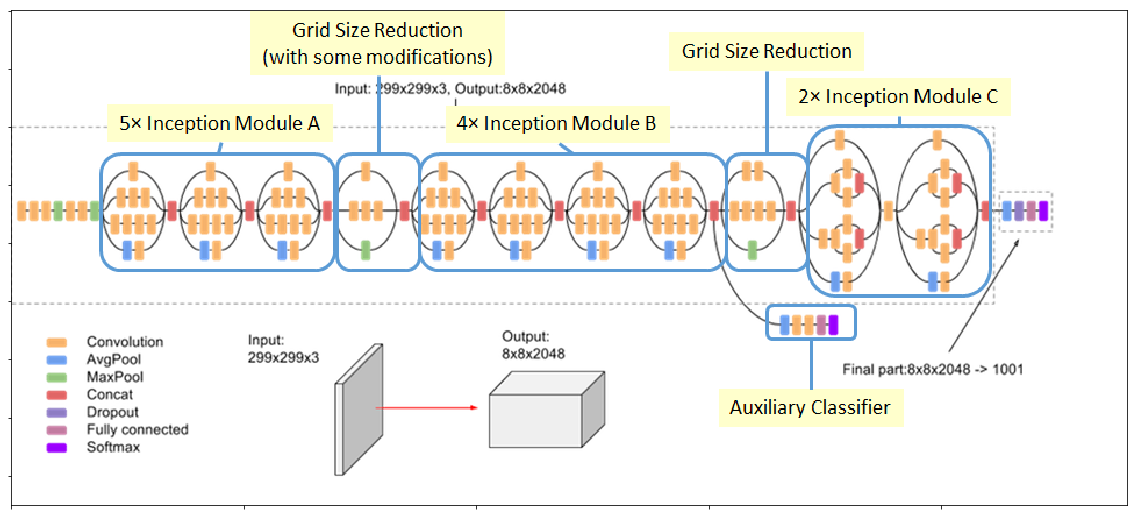

In [14]:
plot2 = plt.imread('../assets/inc_v3.png')
plt.figure(figsize=(20,10))
plt.imshow(plot2)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

In [15]:
########################################################################################################
########################################################################################################
input_tensor = Input(shape=(299, 299, 3))

# with K.tf.device('/gpu:0'):
""" DenseNet """
# model = densenet.DenseNet169(include_top=True, input_tensor=None, input_shape=None,
#                              weights = None,  pooling=None, classes=num_classes) #121, 169, 201
""" Xeption """
# model = xception.Xception(include_top=True, input_tensor=None, input_shape=None,
#                           weights=None, pooling=None, classes=num_classes)
""" InceptionV3 """
model = inception_v3.InceptionV3(include_top= True, input_tensor=input_tensor, input_shape=None,
                                 weights = None, pooling= None, classes=num_classes)
# model = inception_v3.InceptionV3(include_top= True, input_tensor=None, input_shape=None,
#                                  weights=None, pooling=None, classes=num_classes)
""" Inception-ResnetV2 """
# model = inception_resnet_v2.InceptionResNetV2(include_top=True, input_tensor=None, input_shape=None,
#                                               weights = None,  pooling=None, classes=num_classes)


model.compile(loss='categorical_crossentropy', # binary_crossentropy, categorical_crossentropy
              optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy']
              )

########################################################################################################
########################################################################################################


### Display Network 

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

model.summary()
# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

## Model Callbacks (Save)

In [19]:
################################################################################################################
################################################################################################################
model_checkpoint = ModelCheckpoint(model_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max') #'val_loss/min', 'val_acc/max'
reducer = ReduceLROnPlateau(monitor='loss', factor=.8, patience=5, verbose=1, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
logger = CSVLogger(graph_path + save_date + '_batch1.txt', separator=',', append = False)
tb_hist = keras.callbacks.TensorBoard(log_dir=tf_graph_path, histogram_freq=0, write_graph = True,
                                      write_images=True)

callbacks = [model_checkpoint, reducer, logger, tb_hist]

""" Early Stopping """
# early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=0, mode='max')

################################################################################################################
################################################################################################################

' Early Stopping '

## Train Model

### no augmentation

In [20]:
trained_model = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size= batch_size,
          epochs = epochs,
          callbacks = callbacks,
          shuffle = False, ### <- no ID shuffle issue
          class_weight = class_weights, # 'auto',
          verbose=1
          )

print("\n***** Training Model Complete *****")

Train on 9579 samples, validate on 2397 samples
Epoch 1/20
 192/9579 [..............................] - ETA: 3:52:34 - loss: 0.5427 - acc: 0.5104

KeyboardInterrupt: 

### augmentation

In [ ]:
# data generated batch-by-batch
trained_model = model.fit_generator(  
        train_generator,
        steps_per_epoch = len(X_train)//batch_size,
        epochs = epochs,
        shuffle = False, ### <- no ID shuffle issue
        callbacks = callbacks, 
        class_weight = class_weights,
        validation_data = val_generator,
        validation_steps = 5,
        verbose = 1
        )

print("\n***** Training Model Complete *****")

## Display Result

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(trained_model.history['loss'], 'y', label='train loss')
loss_ax.plot(trained_model.history['val_loss'], 'r', label='val loss')
acc_ax.plot(trained_model.history['acc'], 'b', label='train acc')
acc_ax.plot(trained_model.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [21]:
plot3 = plt.imread('../assets/train_process.png')
plt.figure(figsize=(20,10))
plt.imshow(plot3)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

FileNotFoundError: [Errno 2] No such file or directory: '../assets/train_process.png'

### tensorboard 

tensorboard --logdir='절대경로'

## Homework : Kohen's Cappa Metric 사용

- https://en.wikipedia.org/wiki/Cohen%27s_kappa
- https://m.blog.naver.com/PostView.nhn?blogId=y4769&logNo=220680837692&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F

##   \\( k = \frac{p_o - p_e}{1 - p_e} \\)

- It basically tells you how much better your classifier is performing over the performance of a classifier that simply guesses at random according to the frequency of each class.

- po : the observed agreement 
- pe : the expected agreement

- < 0 : no agreement 
- 0–0.20 :  slight
- 0.21–0.40 : fair
- 0.41–0.60 : moderate
- 0.61–0.80 : substantial
- 0.81–1 : almost perfect agreement.